# A1: Three-Layer Neural Network

* Updated Sept. 6th 5:00 PM.  The code cell containing an example of calling the `gradient()` function is modified as shown.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-2">Example Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3">Discussion</a></span></li></ul></div>

## Requirements

In this assignment, you will start with code from lecture notes 04 and add code to do the following.

* Add another hidden layer, for a total of two hidden layers.  This layer will use a weight matrix named `U`.  Its outputs will be named `Zu` and the outputs of the second hidden layer will be changed to `Zv`.
* Define function `forward` that returns the output of all of the layers in the neural network for all samples in `X`. `X` is assumed to be standardized and have the initial column of constant 1 values.

      def forward(X, U, V, W):
          .
          .
          .
          Y = . . . # output of neural network for all rows in X
          return Zu, Zv, Y
      
* Define function `gradient` that returns the gradients of the mean squared error with respect to each of the three weight matrices. `X` and `T` are assumed to be standardized and `X` has the initial column of 1's.

      def gradient(X, T, Zu, Zv, Y, U, V, W):
          .
          .
          .
          return grad_wrt_U, grad_wrt_V, grad_wrt_W
          
* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in the two hidden layers, the number of epochs and the learning rate, which is the same value for all layers. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -1 and 1, and `U`, `V` and `W` for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradient` and `addOnes`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return U, V, W, X_means, X_stds, T_means, T_stds
          
* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

## Example Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def addOnes(X):
    return np.insert(X, 0, 1, axis=1)

Add code cells here to define the functions above.  Once these are correctly defined, the following cells should run and produce similar results as those here.

In [3]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

In [4]:
U = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-1, 3], [1, 3], [-2, 1], [2, -4]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[-1], [2], [3]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 ounit

In [5]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds

In [6]:
Zu, Zv, Y = forward(addOnes(Xtrain_st), U, V, W)
print('Zu = ', Zu)
print('Zv = ', Zv)
print('Y = ', Y)

Zu =  [[-0.99967774 -0.99983726 -0.99991782]
 [-0.65775956 -0.23177837  0.3065367 ]
 [ 0.99246605  0.99958165  0.99997685]
 [ 0.9999941   0.99999995  1.        ]]
Zv =  [[-9.64016194e-01  9.95062648e-01]
 [-5.23485834e-01 -4.06326878e-01]
 [-6.74345774e-03  9.94823310e-01]
 [-5.79521329e-06  9.95054578e-01]]
Y =  [[ 0.05715556]
 [-3.2659523 ]
 [ 1.97098301]
 [ 1.98515214]]


In [7]:
U.shape

(2, 3)

**Update Sept. 6:** In the next code cell, `gradient()` had not been called correctly.  The first argument should have been the input samples matrix with the added initial column of 1's.

In [9]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
# grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(addOnes(Xtrain_st), Ttrain_st, Zu, Zv, Y, U, V, W)
print('grad_wrt_U = ', grad_wrt_U)
print('grad_wrt_V = ', grad_wrt_V)
print('grad_wrt_W = ', grad_wrt_W)

grad_wrt_U =  [[-12.92244218   0.95763799  16.44936549]
 [  5.83033911  -0.43361979  -7.35611199]]
grad_wrt_V =  [[ 0.92812794 -6.29102685]
 [ 6.74349351  4.24106248]
 [ 5.19130234  1.51895191]
 [ 3.19836999 -1.92147926]]
grad_wrt_W =  [[0.74733841]
 [0.30431595]
 [4.31908649]]


In [10]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[ 3.70004445],
       [-7.93083306],
       [10.39844055],
       [10.44803251]])

Here is another example that just shows the final results of training.

In [9]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

In [10]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)

In [11]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

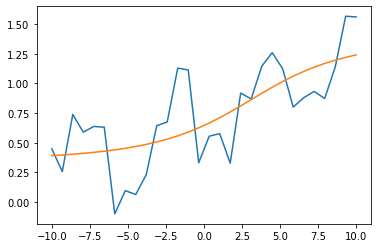

In [12]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

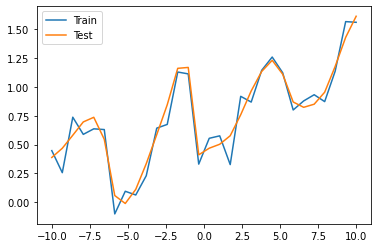

In [15]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

## Discussion

In this markdown cell, describe what difficulties you encountered in completing this assignment. What parts were easy for you and what parts were hard?

# Grading

**A1grader.tar is now available.**

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 10 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [ ]:
%run -i A1grader.py

# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/131494).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.